# Clustering Assignment
## HELP NGO Case Study
### Problem Statement :


HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.
During recent funding they have raised $10million and the NGO needs to decide how to use this money strategically and effectively

Based on the business problem, we can use Clustering algorithm to group the countries using some socio-economic and health factors that determine the overall development of the country

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [3]:
# Read Data - To load data from Country-data.csv
country_df = pd.read_csv("/Users/vamsi/Desktop/Upgrad/Clustering/Assignment/Country-data.csv")

In [4]:
# Inspect Data - To display top 5 rows in data frame
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


##### Analyze the various aspects of the Country dataframe

In [5]:
# Inspect dataframe's columns, shapes, variable types etc.
print(country_df.shape)
print(country_df.columns)
print(country_df.dtypes)

(167, 10)
Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')
country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object


In [6]:
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


##### Understanding of Data frame

As all columns are non-null, there are no nulls in any columns in the dataframe.

In [7]:
# Check missing values if any 
country_df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

##### Based on the data, we understand that exports, imports and health are having % values. So we will convert them into absolute values by adding 3 extra columns to the data frame

In [8]:
# Convert exports percentage to numeric
country_df['exports_total'] = round((country_df['exports']*country_df['gdpp'])/100,2)

In [9]:
# Convert imports percentage to numeric
country_df['imports_total'] = round((country_df['imports']*country_df['gdpp'])/100,2)

In [10]:
# Convert health percentage to numeric
country_df['health_total'] = round((country_df['health']*country_df['gdpp'])/100,2)

In [11]:
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,exports_total,imports_total,health_total
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,55.30,248.30,41.92
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1145.20,1987.74,267.90
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1712.64,1400.44,185.98
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2199.19,1514.37,100.60
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,5551.00,7185.80,735.66


In [12]:
# To drop the unnecessary columns in dataframe
# drop exports, imports, health columns as these are converted to numeric from percentages.
country_df.drop(['exports','imports','health'], axis =1, inplace = True)

In [13]:
# df after data cleansing
country_df.head()

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,exports_total,imports_total,health_total
0,Afghanistan,90.2,1610,9.44,56.2,5.82,553,55.30,248.30,41.92
1,Albania,16.6,9930,4.49,76.3,1.65,4090,1145.20,1987.74,267.90
2,Algeria,27.3,12900,16.10,76.5,2.89,4460,1712.64,1400.44,185.98
3,Angola,119.0,5900,22.40,60.1,6.16,3530,2199.19,1514.37,100.60
4,Antigua and Barbuda,10.3,19100,1.44,76.8,2.13,12200,5551.00,7185.80,735.66


In [14]:
# to reset the index to country column as Country is unique in this dataframe
country_df.set_index(list(country_df)[0])

,child_mort,income,inflation,life_expec,total_fer,gdpp,exports_total,imports_total,health_total
country,,,,,,,,,
Afghanistan,90.2,1610,9.44,56.2,5.82,553,55.30,248.30,41.92
Albania,16.6,9930,4.49,76.3,1.65,4090,1145.20,1987.74,267.90
Algeria,27.3,12900,16.10,76.5,2.89,4460,1712.64,1400.44,185.98
Angola,119.0,5900,22.40,60.1,6.16,3530,2199.19,1514.37,100.60
Antigua and Barbuda,10.3,19100,1.44,76.8,2.13,12200,5551.00,7185.80,735.66
...,...,...,...,...,...,...,...,...,...
Vanuatu,29.2,2950,2.62,63.0,3.50,2970,1384.02,1565.19,155.93
Venezuela,17.1,16500,45.90,75.4,2.47,13500,3847.50,2376.00,662.85
Vietnam,23.3,4490,12.10,73.1,1.95,1310,943.20,1050.62,89.60


### Visualising the Data - Exploratory Data Analysis (EDA)

Data visualisation is mostly for understanding the data. Below are main observations for this step :
- To understand the distribution of each of the columns
- To see if any outliers in each of the columns

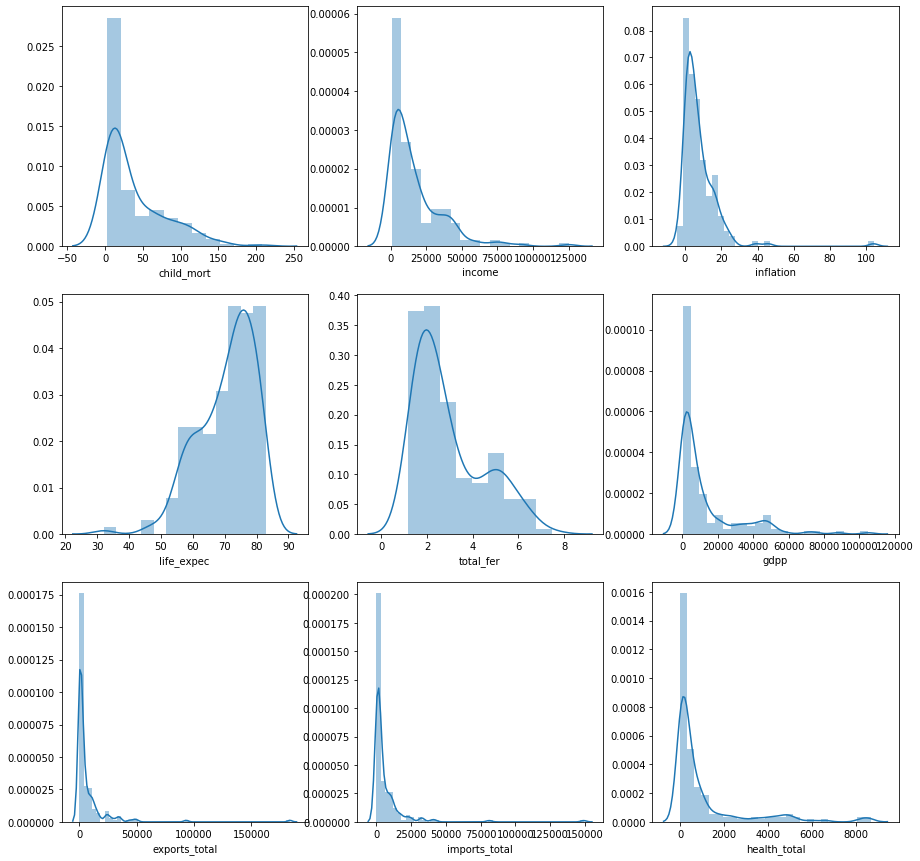

In [15]:
# Draw distplot to understand the distribution for all the columns
plt.figure(figsize = (15, 15))
attribute = ['child_mort', 'income', 'inflation', 'life_expec',
       'total_fer', 'gdpp', 'exports_total', 'imports_total', 'health_total']
for i in enumerate(attribute):
    plt.subplot(3,3,i[0]+1)
    sns.distplot(country_df[i[1]])

Most of the columns are normally distributed, but we have total_fer which has a downtrend between 3-5 and then again increases


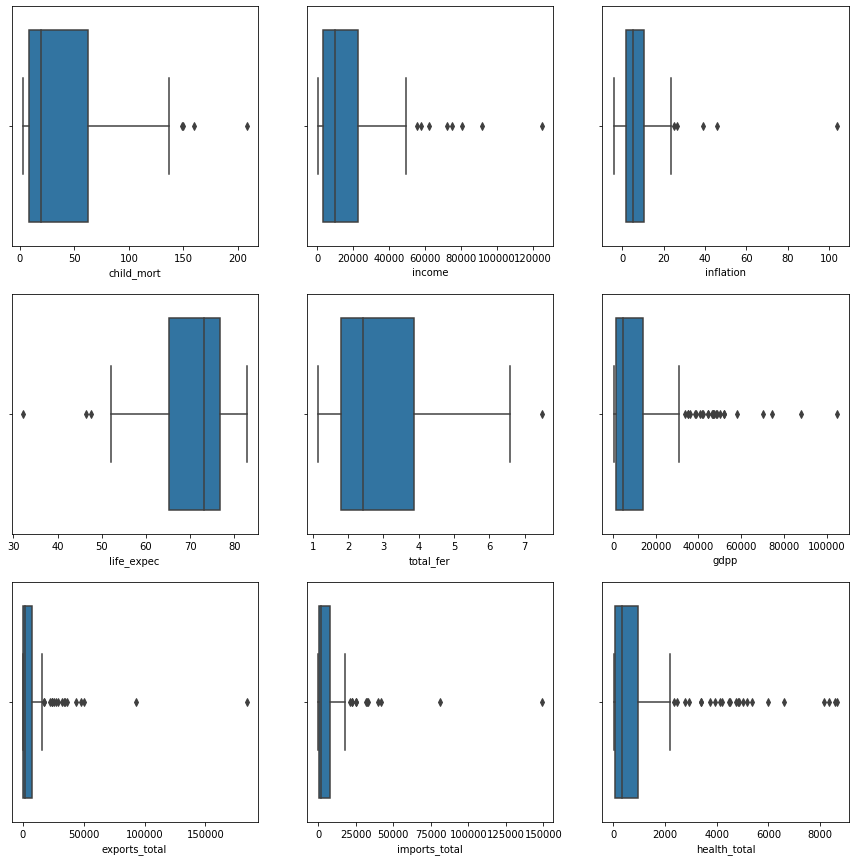

In [16]:
# Draw boxplot to understand the outliers in all the columns
plt.figure(figsize = (15, 15))
attribute = ['child_mort', 'income', 'inflation', 'life_expec',
       'total_fer', 'gdpp', 'exports_total', 'imports_total', 'health_total']
for i in enumerate(attribute):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(country_df[i[1]])

##### We can see outliers in all the columns. So we need to treat each column and try to remove/minimize the outliers. As we have few data (only 160+ records) in our dataframe, instead of removing outliers we use capping. The capping percentage will differ for each column based on its outliers

#### Outlier Analysis

In [17]:
# Outlier Treatment - child_mort
q4 = country_df['child_mort'].quantile(0.99)
country_df['child_mort'][country_df['child_mort']>=q4]=q4

I am taking 0.99 as upper quantile for this column as this is very key column in the data analysis and don't want to change more rows data for this column

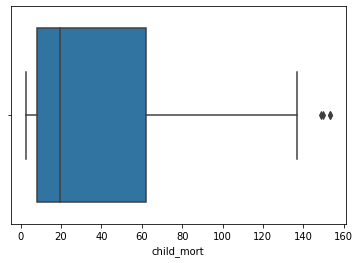

In [18]:
# boxplot after outlier removal
sns.boxplot(country_df['child_mort'])
plt.show()

In [19]:
# Outlier Treatment - income
q4 = country_df['income'].quantile(0.95)
country_df['income'][country_df['income']>=q4]=q4

I am taking 0.95 as upper quantile for this column as capping these higher income countries will not skew our analysis

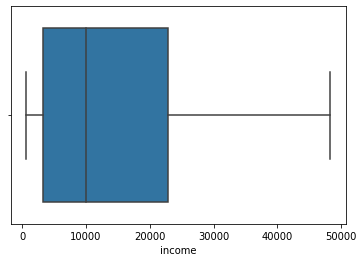

In [20]:
# boxplot after outlier removal
sns.boxplot(country_df['income'])
plt.show()

In [21]:
# Outlier Treatment - inflation
q4 = country_df['inflation'].quantile(0.95)
country_df['inflation'][country_df['inflation']>=q4]=q4

I am taking 0.95 as upper quantile for this column as capping at .99 removing only 1 outlier but at .95 most of them are removed

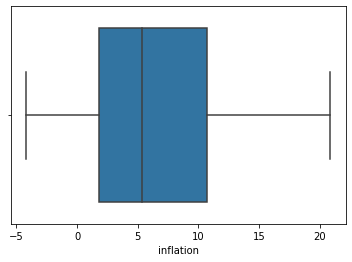

In [22]:
# boxplot after outlier removal
sns.boxplot(country_df['inflation'])
plt.show()

In [23]:
# Outlier Treatment - life_expec
q1 = country_df['life_expec'].quantile(0.01)
country_df['life_expec'][country_df['life_expec']<=q1]=q1

I am taking 0.01 as lower quantile for this column as this is very key column in the determining the countries which needs to be uplifted. 

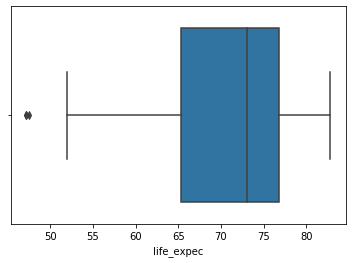

In [24]:
# boxplot after outlier removal
sns.boxplot(country_df['life_expec'])
plt.show()

In [25]:
# Outlier Treatment - total_fer
q4 = country_df['total_fer'].quantile(0.99)
country_df['total_fer'][country_df['total_fer']>=q4]=q4

I am taking 0.99 as upper quantile for this column as this value is key in determining socio status of the countries

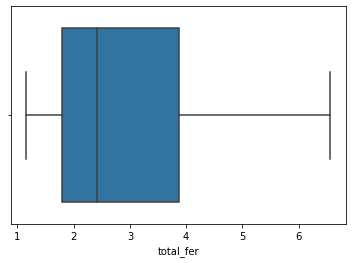

In [26]:
# boxplot after outlier removal
sns.boxplot(country_df['total_fer'])
plt.show()

In [27]:
# Outlier Treatment - gdpp
q4 = country_df['gdpp'].quantile(0.95)
country_df['gdpp'][country_df['gdpp']>=q4]=q4

I am taking 0.95 as upper quantile for this column as this removes lot of outlier coutries which has more gdpp and also i am not caping any values in the lower quantile as if I take 0.05 lot of low gdp countries will be capped to higher value which gives skewed results

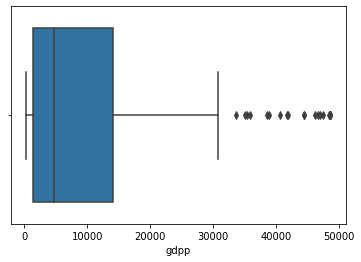

In [28]:
# boxplot after outlier removal
sns.boxplot(country_df['gdpp'])
plt.show()

Still i see lot of outliers in this column but I ignore as the high value gdpp countries will not required any funding and will be less scope of error in our results

In [29]:
# Outlier Treatment - exports_total
q4 = country_df['exports_total'].quantile(0.95)
country_df['exports_total'][country_df['exports_total']>=q4]=q4

I am taking 0.95 as upper quantile for this column as this removes lot of outlier coutries which has more exports and as there are no outliers in lower quantile ignoring capping there

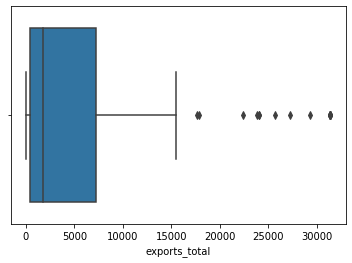

In [30]:
# boxplot after outlier removal
sns.boxplot(country_df['exports_total'])
plt.show()

Still i see lot of outliers in this column but I ignore as the high export countries will not required any funding and will be less scope of error in our results

In [31]:
# Outlier Treatment - imports_total
q4 = country_df['imports_total'].quantile(0.95)
country_df['imports_total'][country_df['imports_total']>=q4]=q4

I am taking 0.95 as upper quantile for this column as this removes lot of outlier coutries which has more imports and as there are no outliers in lower quantile ignoring capping there

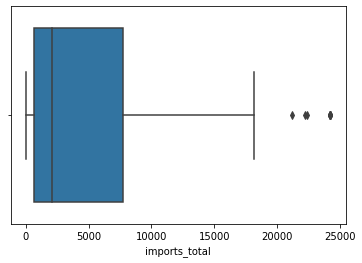

In [32]:
# boxplot after outlier removal
sns.boxplot(country_df['imports_total'])
plt.show()

In [33]:
# Outlier Treatment - health_total
q4 = country_df['health_total'].quantile(0.95)
country_df['health_total'][country_df['health_total']>=q4]=q4

I am taking 0.95 as upper quantile for this column as this removes lot of outlier coutries which are healthier and as there are no outliers in lower quantile ignoring capping there

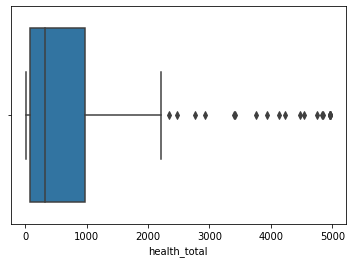

In [34]:
# boxplot after outlier removal
sns.boxplot(country_df['health_total'])
plt.show()

Still i see lot of outliers in this column but I ignore as healthier countries will not require any funding and will be less scope of error in our results

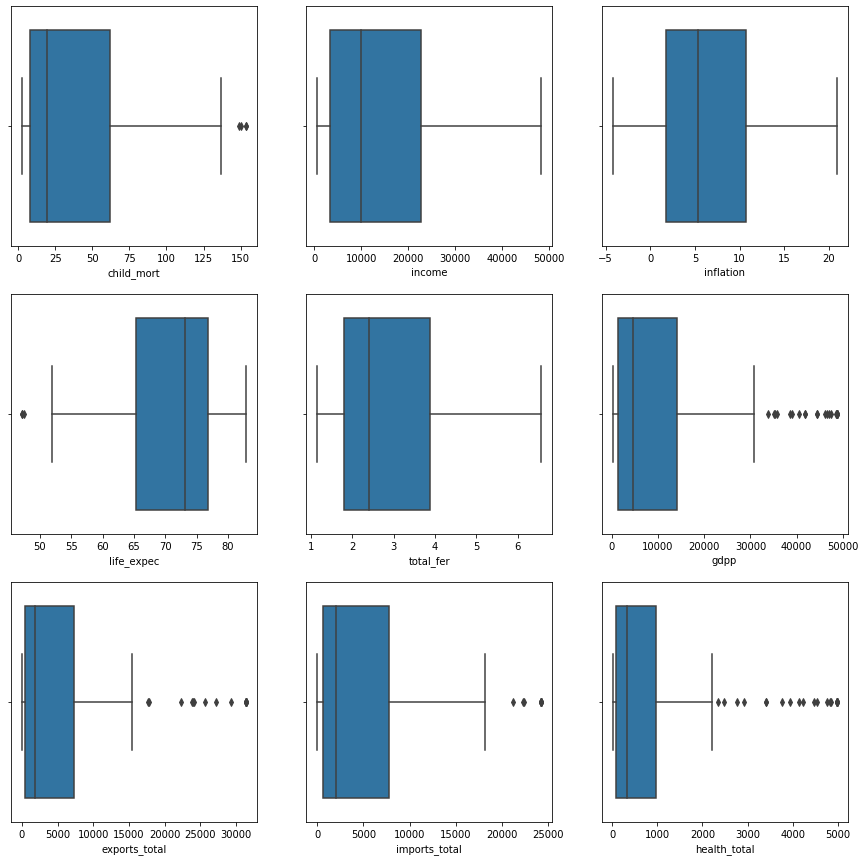

In [35]:
# Draw boxplot after Outlier treatment
plt.figure(figsize = (15, 15))
attribute = ['child_mort', 'income', 'inflation', 'life_expec',
       'total_fer', 'gdpp', 'exports_total', 'imports_total', 'health_total']
for i in enumerate(attribute):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(country_df[i[1]])

#### We can see in lot of columns outliers are treated and there are still few columns which has outliers after capping them to .95. But most of these are for highly developed countries which may not require any funding at all, so this may not skew out results

### Rescaling the features

Scaling makes the variables to be comparable on the same scale. If we don't scale, some of the coefficients will be very large or very small and this will hamper the model evaluation. We have standardisation and min-max scaling techniques.

We will use standardisation scaling for this assignment.

In [36]:
# create a backup dataframe
country_df_bkp = country_df.copy()
country_df_bkp.head()

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,exports_total,imports_total,health_total
0,Afghanistan,90.2,1610.0,9.44,56.2,5.82,553,55.30,248.30,41.92
1,Albania,16.6,9930.0,4.49,76.3,1.65,4090,1145.20,1987.74,267.90
2,Algeria,27.3,12900.0,16.10,76.5,2.89,4460,1712.64,1400.44,185.98
3,Angola,119.0,5900.0,20.87,60.1,6.16,3530,2199.19,1514.37,100.60
4,Antigua and Barbuda,10.3,19100.0,1.44,76.8,2.13,12200,5551.00,7185.80,735.66


In [37]:
# Index columns are not required for scaling
country_df.drop('country', axis = 1, inplace = True)

In [38]:
scale = StandardScaler()
country_df_trf = scale.fit_transform(country_df)

In [39]:
country_df_trf = pd.DataFrame(country_df_trf)
country_df_trf.columns = ['child_mort', 'income', 'inflation', 'life_expec',
       'total_fer', 'gdpp', 'exports_total', 'imports_total', 'health_total']
country_df_trf.head()

,child_mort,income,inflation,life_expec,total_fer,gdpp,exports_total,imports_total,health_total
0,1.344006,-0.958349,0.394438,-1.693071,1.926396,-0.757362,-0.669581,-0.732728,-0.629434
1,-0.547497,-0.394006,-0.383226,0.662026,-0.865054,-0.523321,-0.542172,-0.472182,-0.473485
2,-0.272510,-0.192552,1.440750,0.685460,-0.034983,-0.498838,-0.475838,-0.560152,-0.530018
3,2.084159,-0.667360,2.190136,-1.236112,2.153997,-0.560376,-0.418960,-0.543087,-0.588939
4,-0.709406,0.227992,-0.862393,0.720610,-0.543736,0.013312,-0.027134,0.306422,-0.150685


### Building Cluster Model

#### Validate data using Hopkins score & find optimal number of clusters (K- value) using elbow curve & silhouette score

In [40]:
## Hopkins Score

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [41]:
# Hopkins score is to measure cluster tendency and a score of above 80 is good for clustering
hopkins(country_df_trf)

0.8568468829415461

##### As we got more than 85% in hopkins score this statistically tells that data frame is good for clustering

### KMeans Clustering

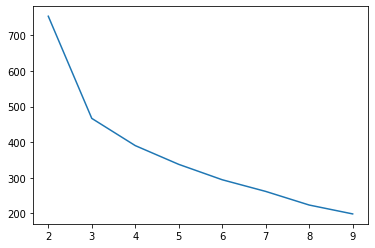

In [42]:
# To find optimal number of clusters - Elbow Curve
ssd = []
for k in range(2, 10):
    model= KMeans(n_clusters = k).fit(country_df_trf)
    ssd.append([k, model.inertia_])
    
plt.plot(pd.DataFrame(ssd)[0], pd.DataFrame(ssd)[1])
plt.show()

##### Based on above elbow curve, we can say that K = 3 clusters are optimal for this dataframe

In [43]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(country_df_trf)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(country_df_trf, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    

For n_clusters=2, the silhouette score is 0.4836178788279627
For n_clusters=3, the silhouette score is 0.4127342570522068
For n_clusters=4, the silhouette score is 0.3798801803540154
For n_clusters=5, the silhouette score is 0.3131675280862899
For n_clusters=6, the silhouette score is 0.3123049755165826
For n_clusters=7, the silhouette score is 0.31102050480119214
For n_clusters=8, the silhouette score is 0.3381846638922875


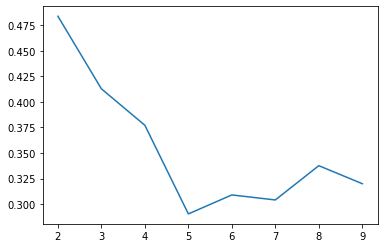

In [44]:
# To find optimal number of clusters - Silhouette Score

from sklearn.metrics import silhouette_score
ss = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters = k).fit(country_df_trf)
    ss.append([k, silhouette_score(country_df_trf, kmeans.labels_)])
    
plt.plot(pd.DataFrame(ss)[0], pd.DataFrame(ss)[1])
plt.show()

##### Based on above Silhuette Score curve, we can say that K = 3 clusters are optimal for this dataframe

In [45]:
# Final Cluster model with k=3
kmeans = KMeans(n_clusters = 3, random_state = 100)
kmeans.fit(country_df_trf)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=100, tol=0.0001, verbose=0)

In [46]:
# Assigning the clusters to the dataframe - creating the df from backup
country_df_cluster = country_df_bkp

In [47]:
# Assigning the clusters to the dataframe - concate cluster id to the dataframe
country_df_cluster['KM_cluster_id'] = kmeans.labels_
country_df_cluster.head()

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,exports_total,imports_total,health_total,KM_cluster_id
0,Afghanistan,90.2,1610.0,9.44,56.2,5.82,553,55.30,248.30,41.92,2
1,Albania,16.6,9930.0,4.49,76.3,1.65,4090,1145.20,1987.74,267.90,1
2,Algeria,27.3,12900.0,16.10,76.5,2.89,4460,1712.64,1400.44,185.98,1
3,Angola,119.0,5900.0,20.87,60.1,6.16,3530,2199.19,1514.37,100.60,2
4,Antigua and Barbuda,10.3,19100.0,1.44,76.8,2.13,12200,5551.00,7185.80,735.66,1


### Profiling the Cluster Model - KMeans

In [48]:
# Cluster counts
country_df_cluster.KM_cluster_id.value_counts()

1    82
2    48
0    37
Name: KM_cluster_id, dtype: int64

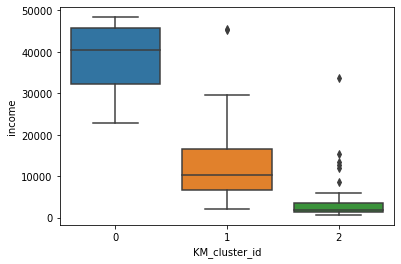

In [49]:
# plot income based on clusters
sns.boxplot(x='KM_cluster_id', y='income', data=country_df_cluster)
plt.show()

##### We can see that cluster 0 corresponds to very high developed countries as their income is huge and cluster 1 contains countries with medium income and cluster 2 contains countries which are under develped as these have very low income. We can validate the same using the cluster id with other variables in next graphs

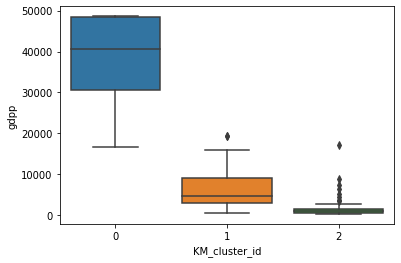

In [50]:
# plot gdpp based on clusters
sns.boxplot(x='KM_cluster_id', y='gdpp', data=country_df_cluster)
plt.show()

##### Here also we can see that cluster 0 with more gdpp i.e. highly developed countries, cluster 1 with medium gdpp and under developed countries which has less gdpp fall under cluster 2

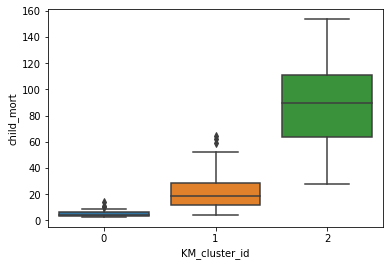

In [51]:
# plot child_mort based on clusters
sns.boxplot(x='KM_cluster_id', y='child_mort', data=country_df_cluster)
plt.show()

##### See in this boxplot, cluster 1 with highly developed countries has very less child mortality rate and cluster 2 has high child mortality rate which we see mostly in underdeveloped countries

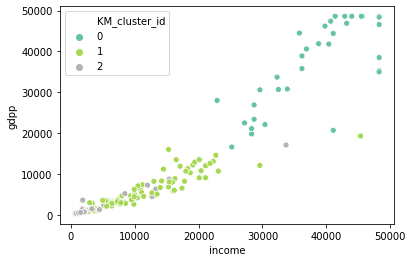

In [52]:
# Scatter plot to view income vs gdpp
sns.scatterplot(x = "income" , y = "gdpp", hue = 'KM_cluster_id', data = country_df_cluster, palette = "Set2")
plt.show()

##### We see countries with high income and high gdpp in cluster 0 which are high developed countries, medium income and medium gdpp cluster 1 and low income and low gdpp in cluster 2. We can see that clustering is done for this data set.

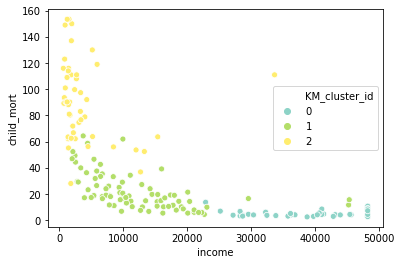

In [53]:
# Scatter plot to view income vs child_mort
sns.scatterplot(x = "income" , y = "child_mort", hue = 'KM_cluster_id', data = country_df_cluster, palette = "Set3")
plt.show()

##### We can see countries with more income has less child mortality and countries with less income has more child mortality which are clustered in different clusters in this scatter plot

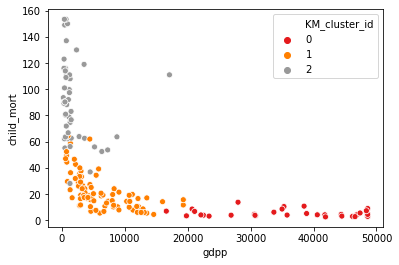

In [54]:
# Scatter plot to view income vs child_mort
sns.scatterplot(x = "gdpp" , y = "child_mort", hue = 'KM_cluster_id', data = country_df_cluster, palette = "Set1")
plt.show()

##### We can see countries with more gdpp has less child mortality and countries with less income has more child mortality and are clustered in 3 different clusters in above scatterplot

In [55]:
# To analyze cluster 2 countries which are under developed and see which countries needs funding
country_df_cluster[country_df_cluster['KM_cluster_id'] == 2].sort_values(by = ['child_mort', 'income', 'gdpp'], ascending = [False, True, True])


,country,child_mort,income,inflation,life_expec,total_fer,gdpp,exports_total,imports_total,health_total,KM_cluster_id
132,Sierra Leone,153.4,1220.0,17.200,55.00,5.2000,399,67.03,137.66,52.27,2
66,Haiti,153.4,1500.0,5.450,47.16,3.3300,662,101.29,428.31,45.74,2
32,Chad,150.0,1930.0,6.390,56.50,6.5636,897,330.10,390.20,40.63,2
31,Central African Republic,149.0,888.0,2.010,47.50,5.2100,446,52.63,118.19,17.75,2
97,Mali,137.0,1870.0,4.370,59.50,6.5500,708,161.42,248.51,35.26,2
113,Nigeria,130.0,5150.0,20.870,60.50,5.8400,2330,589.49,405.42,118.13,2
112,Niger,123.0,814.0,2.550,58.80,6.5636,348,77.26,170.87,17.96,2
3,Angola,119.0,5900.0,20.870,60.10,6.1600,3530,2199.19,1514.37,100.60,2
37,"Congo, Dem. Rep.",116.0,609.0,20.800,57.50,6.5400,334,137.27,165.66,26.42,2
25,Burkina Faso,116.0,1430.0,6.810,57.90,5.8700,575,110.40,170.20,38.76,2


### Hierachial Clustering

In [56]:
#Scaled Dataframe
country_df_trf.head()

,child_mort,income,inflation,life_expec,total_fer,gdpp,exports_total,imports_total,health_total
0,1.344006,-0.958349,0.394438,-1.693071,1.926396,-0.757362,-0.669581,-0.732728,-0.629434
1,-0.547497,-0.394006,-0.383226,0.662026,-0.865054,-0.523321,-0.542172,-0.472182,-0.473485
2,-0.272510,-0.192552,1.440750,0.685460,-0.034983,-0.498838,-0.475838,-0.560152,-0.530018
3,2.084159,-0.667360,2.190136,-1.236112,2.153997,-0.560376,-0.418960,-0.543087,-0.588939
4,-0.709406,0.227992,-0.862393,0.720610,-0.543736,0.013312,-0.027134,0.306422,-0.150685


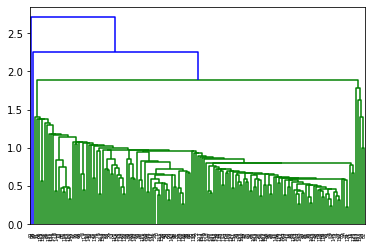

In [57]:
# single linkage Hierarchial Clustering
mergings = linkage(country_df_trf, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

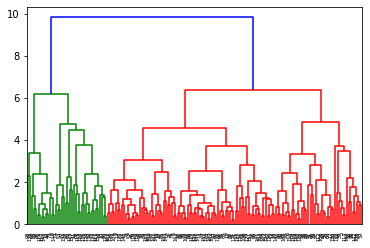

In [58]:
# complete linkage Hierarchial Clustering
mergings = linkage(country_df_trf, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [59]:
# 4 clusters
Hier_cluster_id = cut_tree(mergings, n_clusters=4).reshape(-1, )
Hier_cluster_id

array([0, 1, 1, 0, 1, 1, 1, 2, 3, 1, 2, 2, 1, 1, 1, 3, 1, 0, 1, 1, 1, 1,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 2,
       3, 1, 1, 1, 1, 0, 0, 1, 1, 3, 2, 0, 0, 1, 3, 0, 2, 1, 1, 0, 0, 1,
       0, 1, 3, 1, 1, 1, 0, 3, 2, 2, 1, 2, 1, 1, 0, 1, 2, 1, 0, 1, 1, 0,
       0, 2, 1, 3, 1, 0, 0, 1, 1, 0, 3, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       3, 2, 0, 0, 3, 2, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2, 0, 1, 1,
       0, 3, 2, 2, 1, 1, 2, 2, 1, 1, 0, 1, 3, 3, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0])

In [60]:
# assign cluster labels
country_df_cluster['Hier_cluster_id'] = Hier_cluster_id
country_df_cluster.head()

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,exports_total,imports_total,health_total,KM_cluster_id,Hier_cluster_id
0,Afghanistan,90.2,1610.0,9.44,56.2,5.82,553,55.30,248.30,41.92,2,0
1,Albania,16.6,9930.0,4.49,76.3,1.65,4090,1145.20,1987.74,267.90,1,1
2,Algeria,27.3,12900.0,16.10,76.5,2.89,4460,1712.64,1400.44,185.98,1,1
3,Angola,119.0,5900.0,20.87,60.1,6.16,3530,2199.19,1514.37,100.60,2,0
4,Antigua and Barbuda,10.3,19100.0,1.44,76.8,2.13,12200,5551.00,7185.80,735.66,1,1


In [61]:
# Cluster counts
country_df_cluster.Hier_cluster_id.value_counts()

1    84
0    43
2    26
3    14
Name: Hier_cluster_id, dtype: int64

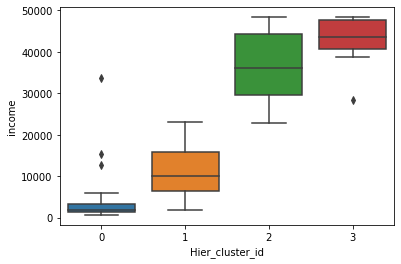

In [62]:
# plot income based on clusters
sns.boxplot(x='Hier_cluster_id', y='income', data=country_df_cluster)
plt.show()

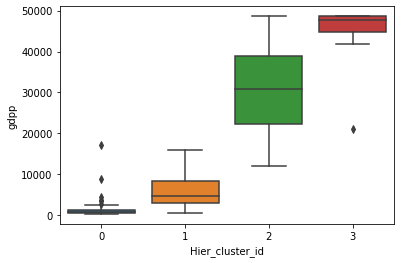

In [63]:
# plot gdpp based on clusters
sns.boxplot(x='Hier_cluster_id', y='gdpp', data=country_df_cluster)
plt.show()

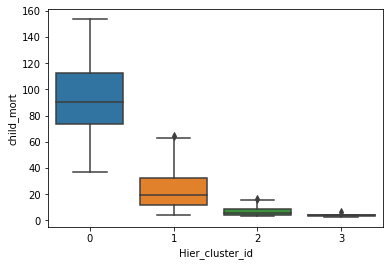

In [64]:
# plot child_mort based on clusters
sns.boxplot(x='Hier_cluster_id', y='child_mort', data=country_df_cluster)
plt.show()

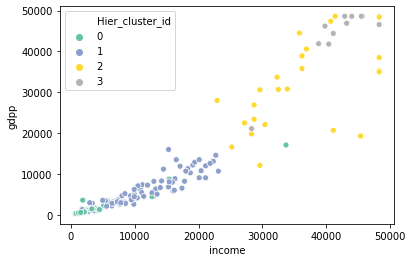

In [65]:
# Scatter plot to view income vs gdpp
sns.scatterplot(x = "income" , y = "gdpp", hue = 'Hier_cluster_id', data = country_df_cluster, palette = "Set2")
plt.show()

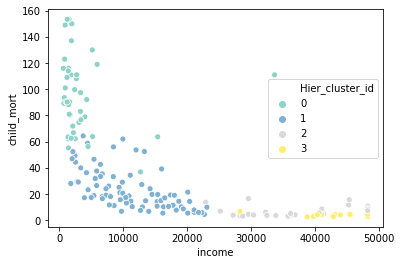

In [66]:
# Scatter plot to view income vs child_mort
sns.scatterplot(x = "income" , y = "child_mort", hue = 'Hier_cluster_id', data = country_df_cluster, palette = "Set3")
plt.show()

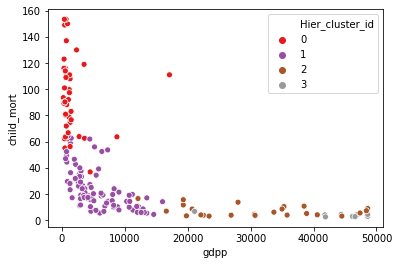

In [67]:
# Scatter plot to view income vs child_mort
sns.scatterplot(x = "gdpp" , y = "child_mort", hue = 'Hier_cluster_id', data = country_df_cluster, palette = "Set1")
plt.show()

In [68]:
# To analyze cluster 2 countries which are under developed and see which countries needs funding
country_df_cluster[country_df_cluster['Hier_cluster_id'] == 0].sort_values(by = ['child_mort', 'income', 'gdpp'], ascending = [False, True, True])



,country,child_mort,income,inflation,life_expec,total_fer,gdpp,exports_total,imports_total,health_total,KM_cluster_id,Hier_cluster_id
132,Sierra Leone,153.4,1220.0,17.200,55.00,5.2000,399,67.03,137.66,52.27,2,0
66,Haiti,153.4,1500.0,5.450,47.16,3.3300,662,101.29,428.31,45.74,2,0
32,Chad,150.0,1930.0,6.390,56.50,6.5636,897,330.10,390.20,40.63,2,0
31,Central African Republic,149.0,888.0,2.010,47.50,5.2100,446,52.63,118.19,17.75,2,0
97,Mali,137.0,1870.0,4.370,59.50,6.5500,708,161.42,248.51,35.26,2,0
113,Nigeria,130.0,5150.0,20.870,60.50,5.8400,2330,589.49,405.42,118.13,2,0
112,Niger,123.0,814.0,2.550,58.80,6.5636,348,77.26,170.87,17.96,2,0
3,Angola,119.0,5900.0,20.870,60.10,6.1600,3530,2199.19,1514.37,100.60,2,0
37,"Congo, Dem. Rep.",116.0,609.0,20.800,57.50,6.5400,334,137.27,165.66,26.42,2,0
25,Burkina Faso,116.0,1430.0,6.810,57.90,5.8700,575,110.40,170.20,38.76,2,0
